In [ ]:

import pandas as pd
import numpy as np

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [ ]:
train.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일,허위매물여부
0,TRAIN_0000,현장확인,402500000.0,470000,NaN,NaN,15.0,서향,1.0,1.0,가능,40.0,96,t93Nt6I2I0,B플랫폼,2024-10-09,0
1,TRAIN_0001,현장확인,170500000.0,200000,NaN,3.0,4.0,남동향,2.0,1.0,불가능,NaN,0,q39iV5J4E6,D플랫폼,2024-12-26,0
2,TRAIN_0002,전화확인,114000000.0,380000,NaN,2.0,3.0,동향,1.0,1.0,불가능,NaN,0,b03oE4G3F6,A플랫폼,2024-11-28,0
3,TRAIN_0003,현장확인,163500000.0,30000,36.3,3.0,9.0,남동향,2.0,1.0,가능,13.0,10,G52Iz8V2B9,A플랫폼,2024-11-26,0
4,TRAIN_0004,현장확인,346000000.0,530000,NaN,3.0,3.0,동향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-06-25,1


In [ ]:
test.head()

,ID,매물확인방식,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,관리비,중개사무소,제공플랫폼,게재일
0,TEST_000,서류확인,223000000.0,530000,NaN,5.0,5.0,남향,1.0,1.0,불가능,NaN,7,Z86Th6S3K5,D플랫폼,2024-10-21
1,TEST_001,서류확인,150500000.0,590000,30.26,7.0,11.0,서향,1.0,1.0,불가능,16.0,11,G52Iz8V2B9,D플랫폼,2023-09-02
2,TEST_002,현장확인,47000000.0,200000,41.50,2.0,3.0,남서향,2.0,1.0,불가능,NaN,0,N45gM0M7R0,B플랫폼,2024-04-03
3,TEST_003,서류확인,133000000.0,250000,31.35,5.0,6.0,남향,2.0,1.0,가능,NaN,5,C41wx1K6U9,B플랫폼,2024-09-19
4,TEST_004,현장확인,108000000.0,380000,23.14,2.0,3.0,남향,1.0,1.0,불가능,NaN,0,Z68ZJ6F6L4,A플랫폼,2024-11-10


In [ ]:
train.info()
# 결측: 전용면적, 해당층, 총층, 방수, 욕실수, 총주차대수
# 주차가능여부 (최빈값) > 총층 > 해당층
# 방수 (최빈값) > 욕실수
# 방수 > 전용면적
# 문자: 매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼, 게재일

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      2452 non-null   object 
 1   매물확인방식  2452 non-null   object 
 2   보증금     2452 non-null   float64
 3   월세      2452 non-null   int64  
 4   전용면적    1665 non-null   float64
 5   해당층     2223 non-null   float64
 6   총층      2436 non-null   float64
 7   방향      2452 non-null   object 
 8   방수      2436 non-null   float64
 9   욕실수     2434 non-null   float64
 10  주차가능여부  2452 non-null   object 
 11  총주차대수   1756 non-null   float64
 12  관리비     2452 non-null   int64  
 13  중개사무소   2452 non-null   object 
 14  제공플랫폼   2452 non-null   object 
 15  게재일     2452 non-null   object 
 16  허위매물여부  2452 non-null   int64  
dtypes: float64(7), int64(3), object(7)
memory usage: 325.8+ KB


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 613 entries, 0 to 612
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      613 non-null    object 
 1   매물확인방식  613 non-null    object 
 2   보증금     613 non-null    float64
 3   월세      613 non-null    int64  
 4   전용면적    429 non-null    float64
 5   해당층     563 non-null    float64
 6   총층      611 non-null    float64
 7   방향      613 non-null    object 
 8   방수      611 non-null    float64
 9   욕실수     611 non-null    float64
 10  주차가능여부  613 non-null    object 
 11  총주차대수   438 non-null    float64
 12  관리비     613 non-null    int64  
 13  중개사무소   613 non-null    object 
 14  제공플랫폼   613 non-null    object 
 15  게재일     613 non-null    object 
dtypes: float64(7), int64(2), object(7)
memory usage: 76.8+ KB


In [ ]:
# 문자: 매물확인방식, 방향, 주차가능여부, 중개사무소, 제공플랫폼 게재일
display(train['매물확인방식'].unique())
display(train['방향'].unique())
display(train['주차가능여부'].unique())
display(train['중개사무소'].unique())
display(train['제공플랫폼'].unique())
display(train['게재일'].unique())

array(['현장확인', '전화확인', '서류확인'], dtype=object)

array(['서향', '남동향', '동향', '남향', '북동향', '북향', '남서향', '북서향'], dtype=object)

array(['가능', '불가능'], dtype=object)

array(['t93Nt6I2I0', 'q39iV5J4E6', 'b03oE4G3F6', 'G52Iz8V2B9',
       'N45gM0M7R0', 'Q42YF3Y0I2', 'A72Mx9C8U2', 'd22DX4Y4P8',
       'M90Ph8W9V3', 'J30yG7F1O0', 'H90uE4C0W5', 'Y04yg0T7Z5',
       'N00fb8Z9A4', 'G95MY2L8J8', 'r82ax9M3U3', 'a15xR3G4V0',
       'W88DA3W2Q3', 'S69fV9Z3J7', 'o80Xg3Q1Q7', 'K86UF7I0P3',
       'Q27Pd1N0R1', 'Z18up3D1C3', 'l47ci2X2G0', 'S30er7F3P4',
       'D47oH9N4M3', 'k74XT0T1B8', 'S12iP7V0Q9', 'S14na8Q8K2',
       'C41wx1K6U9', 'm69GM9O9B3', 'r16Dr6Z7C3', 'E29LO2X8S7',
       'J07Zn4B0R7', 'b90Kl2S4L3', 't44kB9X5Y9', 'w37Qk3B9D2',
       'O55VW6U4R7', 'D49QC8I7L2', 'k87TR0Q8N4', 'o61te4S1W1',
       'K38kY2R6G0', 'Z81Jv8Z5G2', 'm44pw5A9I1', 'u04Gp5J3R0',
       'K48zc2G4K8', 'f41Wq8P7T9', 'o30ws9C6F7', 'J52gJ2E4T6',
       'C10hv5Y7M9', 'z40LO7P9C9', 'M02bn7Y4P0', 'Y65Hw0Z3K0',
       'A18IU3D9M4', 'u92NN7A1E5', 'D26uW0Q2N3', 'X71Iq5L2C6',
       'I81Xq1F6S7', 'B44YF9W3O5', 'i07Ja2R7A8', 'b87Td0W4Y3',
       'z54Fl0B2P9', 's37cv8A6L4', 'K25cF2K7X6', 'U93ap

array(['B플랫폼', 'D플랫폼', 'A플랫폼', 'C플랫폼', 'F플랫폼', 'G플랫폼', 'E플랫폼', 'J플랫폼',
       'H플랫폼', 'I플랫폼', 'L플랫폼', 'K플랫폼', 'M플랫폼'], dtype=object)

array(['2024-10-09', '2024-12-26', '2024-11-28', '2024-11-26',
       '2024-06-25', '2024-09-12', '2024-08-23', '2025-03-03',
       '2024-05-23', '2024-11-30', '2023-12-16', '2024-03-25',
       '2024-07-15', '2025-02-18', '2024-11-02', '2023-10-18',
       '2023-11-05', '2024-10-16', '2024-09-15', '2024-11-04',
       '2024-10-29', '2024-07-28', '2024-05-12', '2024-10-23',
       '2024-10-15', '2024-11-19', '2024-11-18', '2024-10-02',
       '2025-01-02', '2024-04-14', '2023-11-08', '2024-07-10',
       '2024-09-30', '2025-01-20', '2024-08-03', '2024-09-17',
       '2024-07-05', '2024-10-06', '2024-02-02', '2023-11-26',
       '2024-12-24', '2024-12-21', '2024-11-25', '2024-06-05',
       '2024-12-22', '2023-12-19', '2024-02-16', '2024-12-08',
       '2024-07-24', '2024-12-31', '2024-10-05', '2024-03-10',
       '2023-09-17', '2025-03-02', '2025-01-24', '2025-02-02',
       '2024-10-11', '2024-04-23', '2024-07-03', '2023-12-03',
       '2024-03-29', '2024-11-11', '2024-11-22', '2024-

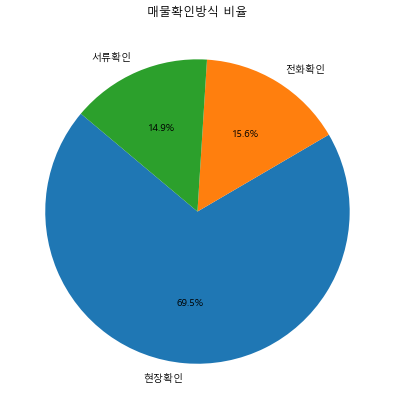

None

현장확인    1705
전화확인     382
서류확인     365
Name: 매물확인방식, dtype: int64

In [ ]:
# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 값 개수 세기
platform_counts = train['매물확인방식'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)

# 제목 추가
plt.title('매물확인방식 비율')

# 그래프 표시
display(plt.show())
display(platform_counts)

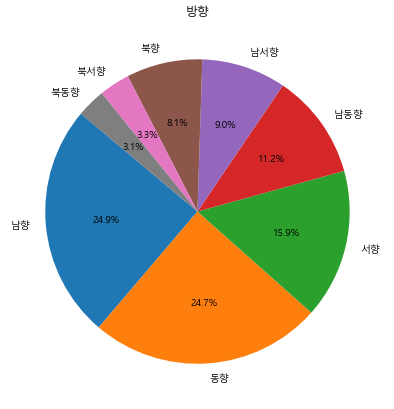

None

남향     610
동향     605
서향     389
남동향    275
남서향    220
북향     198
북서향     80
북동향     75
Name: 방향, dtype: int64

In [ ]:
# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 값 개수 세기
platform_counts = train['방향'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)

# 제목 추가
plt.title('방향')

# 그래프 표시
display(plt.show())
display(platform_counts)

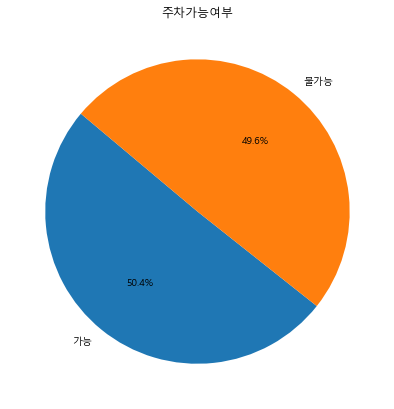

None

가능     1237
불가능    1215
Name: 주차가능여부, dtype: int64

In [ ]:
# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 값 개수 세기
platform_counts = train['주차가능여부'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)

# 제목 추가
plt.title('주차가능여부')

# 그래프 표시
display(plt.show())
display(platform_counts)

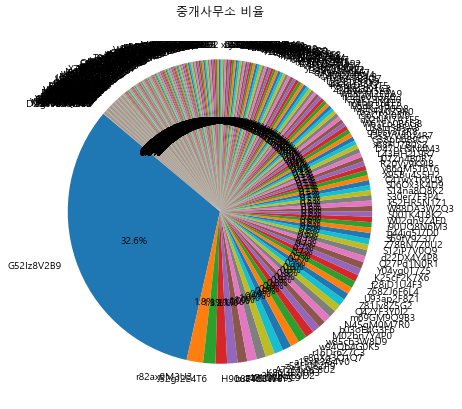

None

G52Iz8V2B9    799
r82ax9M3U3     43
J52gJ2E4T6     32
H90uE4C0W5     30
b87Td0W4Y3     27
             ... 
m75Dz8P6I7      1
A21Yr4B1U8      1
g11ci7P5V1      1
D26uW0Q2N3      1
L27JO3N6S2      1
Name: 중개사무소, Length: 279, dtype: int64

In [ ]:
# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 값 개수 세기
platform_counts = train['중개사무소'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)

# 제목 추가
plt.title('중개사무소 비율')

# 그래프 표시
display(plt.show())
display(platform_counts)

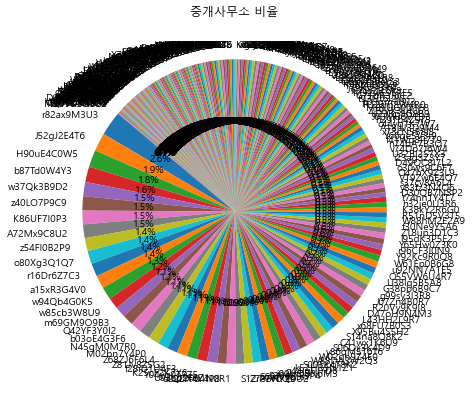

None

r82ax9M3U3    43
J52gJ2E4T6    32
H90uE4C0W5    30
b87Td0W4Y3    27
w37Qk3B9D2    25
              ..
A06Nz2Z1R1     1
q01Dr2J6A9     1
O63UL1A1D7     1
M20VK3G8C9     1
L27JO3N6S2     1
Name: 중개사무소, Length: 278, dtype: int64

In [ ]:
# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 값 개수 세기
df = train[train['중개사무소'] != 'G52Iz8V2B9'] # 최빈값 제외
platform_counts = df['중개사무소'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)

# 제목 추가
plt.title('중개사무소 비율')

# 그래프 표시
display(plt.show())
display(platform_counts)

# 와 그래프 진짜 끔찍하다

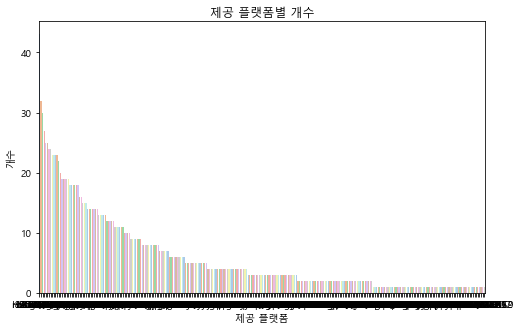

None

r82ax9M3U3    43
J52gJ2E4T6    32
H90uE4C0W5    30
b87Td0W4Y3    27
w37Qk3B9D2    25
              ..
A06Nz2Z1R1     1
q01Dr2J6A9     1
O63UL1A1D7     1
M20VK3G8C9     1
L27JO3N6S2     1
Name: 중개사무소, Length: 278, dtype: int64

In [ ]:

# 한글 폰트 설정 (윈도우: 맑은 고딕, 맥: 애플고딕)
plt.rc('font', family='Malgun Gothic')

# 값 개수 세기
df = train[train['중개사무소'] != 'G52Iz8V2B9'] # 최빈값 제외
platform_counts = df['중개사무소'].value_counts()


# 그래프 크기 설정
plt.figure(figsize=(8, 5))

# 막대 그래프 그리기
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='pastel')

# 라벨 추가
plt.xlabel('제공 플랫폼')
plt.ylabel('개수')
plt.title('제공 플랫폼별 개수')

#ㅠ 값 표시
# for i, v in enumerate(platform_counts.values):
#     plt.text(i, v + 0.2, str(v), ha='center', fontsize=12)

# 그래프 표시
display(plt.show())
display(platform_counts)

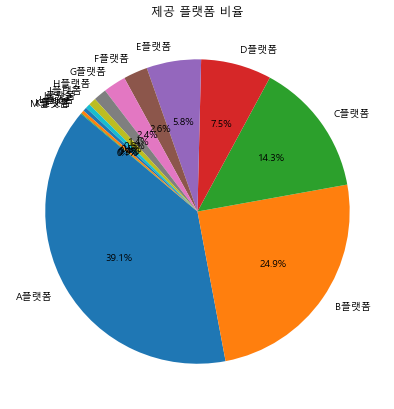

None

A플랫폼    958
B플랫폼    610
C플랫폼    350
D플랫폼    184
E플랫폼    142
F플랫폼     63
G플랫폼     59
H플랫폼     34
I플랫폼     20
J플랫폼     12
L플랫폼     10
K플랫폼      8
M플랫폼      2
Name: 제공플랫폼, dtype: int64

In [ ]:
# 한글 폰트 설정 (예: 맑은 고딕)
plt.rc('font', family='Malgun Gothic')

# 값 개수 세기
platform_counts = train['제공플랫폼'].value_counts()

# 파이 차트 그리기
plt.figure(figsize=(7, 7))
plt.pie(platform_counts, labels=platform_counts.index, autopct='%1.1f%%', startangle=140)

# 제목 추가
plt.title('제공 플랫폼 비율')

# 그래프 표시
display(plt.show())
display(platform_counts)

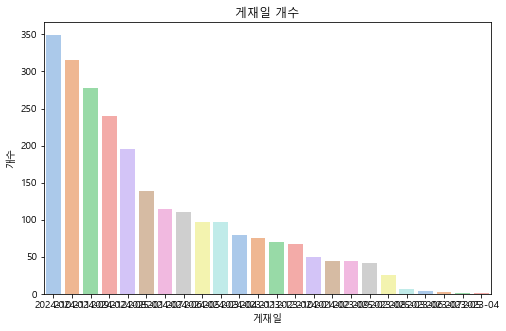

None

2024-10    349
2024-11    316
2024-09    278
2024-12    240
2024-08    195
2025-01    139
2024-07    115
2024-06    111
2024-05     97
2024-03     97
2024-04     80
2023-11     76
2023-12     70
2023-10     68
2024-01     50
2024-02     44
2023-09     44
2025-02     42
2023-08     25
2025-03      7
2023-06      4
2023-07      3
2023-05      1
2023-04      1
Name: 게재일, dtype: int64

In [ ]:

# 한글 폰트 설정 (윈도우: 맑은 고딕, 맥: 애플고딕)
plt.rc('font', family='Malgun Gothic')

# 값 개수 세기
df = train
df['게재일'] = df['게재일'].str[:7]
platform_counts = df['게재일'].value_counts()


# 그래프 크기 설정
plt.figure(figsize=(8, 5))

# 막대 그래프 그리기
sns.barplot(x=platform_counts.index, y=platform_counts.values, palette='pastel')

# 라벨 추가
plt.xlabel('게재일')
plt.ylabel('개수')
plt.title('게재일 개수')

# 값 표시
# for i, v in enumerate(platform_counts.values):
#     plt.text(i, v + 0.2, str(v), ha='center', fontsize=12)

# 그래프 표시
display(plt.show())
display(platform_counts)

In [ ]:
#원핫인코딩
#매물확인, 제공플랫폼

train_df = pd.get_dummies(train, columns=['매물확인방식', '제공플랫폼'], dtype=int)

#바이너리인코딩
train_df['주차가능여부'] = train_df['주차가능여부'].map({'가능': 1, '불가능': 0})

#순서형 인코딩
#남향 > 남동향 > 남서향 > 동향 > 서향 > 북동향 > 북서향 > 북향 순으로 가중치
direction_order = {'남향': 7, '남동향': 6, '남서향': 5, '동향': 4, '서향': 3, '북동향': 2, '북서향': 1, '북향': 0}
train_df['방향'] = train_df['방향'].map(direction_order)

#빈도기반
train_df['중개사무소'] = train_df['중개사무소'].map(df['중개사무소'].value_counts())

# 연도-월을 순서형으로 변환
date_order = ['2023-04', '2023-05', '2023-06', '2023-07', '2023-08', '2023-09', '2023-10', '2023-11', '2023-12',
              '2024-01', '2024-02', '2024-03', '2024-04', '2024-05', '2024-06', '2024-07', '2024-08', '2024-09',
              '2024-10', '2024-11', '2024-12', '2025-01', '2025-02', '2025-03']
train_df['게재일'] = pd.Categorical(train_df['게재일'], categories=date_order, ordered=True).codes


train_df = train_df.drop(columns=['ID'])

display(train_df)
display(train_df.info())

,보증금,월세,전용면적,해당층,총층,방향,방수,욕실수,주차가능여부,총주차대수,...,제공플랫폼_D플랫폼,제공플랫폼_E플랫폼,제공플랫폼_F플랫폼,제공플랫폼_G플랫폼,제공플랫폼_H플랫폼,제공플랫폼_I플랫폼,제공플랫폼_J플랫폼,제공플랫폼_K플랫폼,제공플랫폼_L플랫폼,제공플랫폼_M플랫폼
0,402500000.0,470000,NaN,NaN,15.0,3,1.0,1.0,1,40.0,...,0,0,0,0,0,0,0,0,0,0
1,170500000.0,200000,NaN,3.0,4.0,6,2.0,1.0,0,NaN,...,1,0,0,0,0,0,0,0,0,0
2,114000000.0,380000,NaN,2.0,3.0,4,1.0,1.0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
3,163500000.0,30000,36.30,3.0,9.0,6,2.0,1.0,1,13.0,...,0,0,0,0,0,0,0,0,0,0
4,346000000.0,530000,NaN,3.0,3.0,4,2.0,1.0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2447,159000000.0,550000,48.95,3.0,3.0,7,2.0,1.0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2448,158500000.0,750000,NaN,2.0,4.0,7,1.0,1.0,0,NaN,...,0,0,0,0,0,0,0,0,0,0
2449,329000000.0,610000,17.50,8.0,20.0,5,1.0,1.0,1,29.0,...,0,0,0,0,0,0,0,0,0,0
2450,31000000.0,400000,22.87,8.0,9.0,6,2.0,1.0,1,NaN,...,0,0,0,0,0,0,0,0,0,0


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2452 entries, 0 to 2451
Data columns (total 30 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   보증금          2452 non-null   float64
 1   월세           2452 non-null   int64  
 2   전용면적         1665 non-null   float64
 3   해당층          2223 non-null   float64
 4   총층           2436 non-null   float64
 5   방향           2452 non-null   int64  
 6   방수           2436 non-null   float64
 7   욕실수          2434 non-null   float64
 8   주차가능여부       2452 non-null   int64  
 9   총주차대수        1756 non-null   float64
 10  관리비          2452 non-null   int64  
 11  중개사무소        2452 non-null   int64  
 12  게재일          2452 non-null   int8   
 13  허위매물여부       2452 non-null   int64  
 14  매물확인방식_서류확인  2452 non-null   int32  
 15  매물확인방식_전화확인  2452 non-null   int32  
 16  매물확인방식_현장확인  2452 non-null   int32  
 17  제공플랫폼_A플랫폼   2452 non-null   int32  
 18  제공플랫폼_B플랫폼   2452 non-null   int32  
 19  제공플랫폼_

None

In [ ]:
train.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비,허위매물여부
count,2.452000e+03,2452.000000,1665.000000,2223.000000,2436.000000,2436.000000,2434.000000,1756.000000,2452.000000,2452.000000
mean,1.574188e+08,380420.065253,27.009628,4.848403,8.052545,1.378079,1.034511,20.332574,5.477977,0.121533
std,1.212794e+08,206425.413601,7.951757,3.543348,4.920112,0.485007,0.182575,28.939900,5.631185,0.326813
min,5.000000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,7.500000e+07,200000.000000,19.800000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000,0.000000
50%,1.325000e+08,380000.000000,26.400000,4.000000,6.000000,1.000000,1.000000,10.000000,5.000000,0.000000
75%,1.890000e+08,550000.000000,32.110000,6.000000,10.000000,2.000000,1.000000,31.000000,9.000000,0.000000
max,4.090000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,590.000000,96.000000,1.000000


In [ ]:
test.describe()

,보증금,월세,전용면적,해당층,총층,방수,욕실수,총주차대수,관리비
count,6.130000e+02,613.000000,429.000000,563.000000,611.000000,611.000000,611.000000,438.000000,613.000000
mean,1.493581e+08,380619.902121,27.763800,4.486679,7.692308,1.400982,1.034370,20.292237,5.435563
std,1.089524e+08,208720.676924,8.088812,3.315189,4.643019,0.490499,0.182327,22.873775,5.221359
min,8.500000e+06,0.000000,17.500000,1.000000,2.000000,1.000000,1.000000,1.000000,0.000000
25%,6.300000e+07,190000.000000,20.360000,2.000000,4.000000,1.000000,1.000000,4.000000,0.000000
50%,1.370000e+08,380000.000000,27.220000,3.000000,6.000000,1.000000,1.000000,11.500000,5.000000
75%,1.985000e+08,560000.000000,33.050000,5.000000,10.000000,2.000000,1.000000,31.750000,9.000000
max,4.595000e+08,750000.000000,49.970000,21.000000,21.000000,2.000000,2.000000,169.000000,23.000000


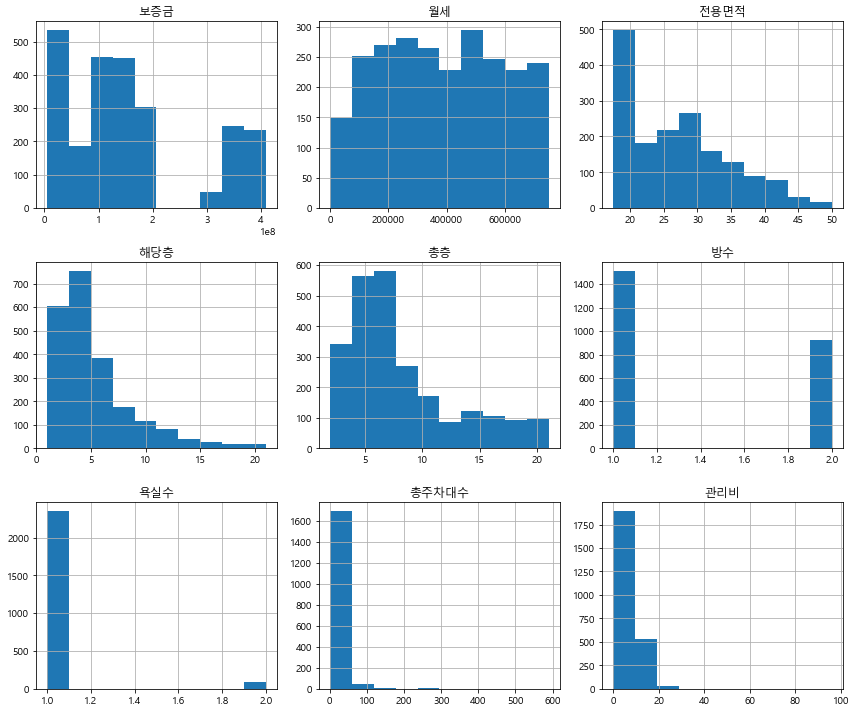

In [ ]:
numeric = train[['보증금', '월세', '전용면적', '해당층', '총층', '방수', '욕실수', '총주차대수', '관리비']]

numeric.hist(figsize=(12,10))
plt.tight_layout()
plt.show()

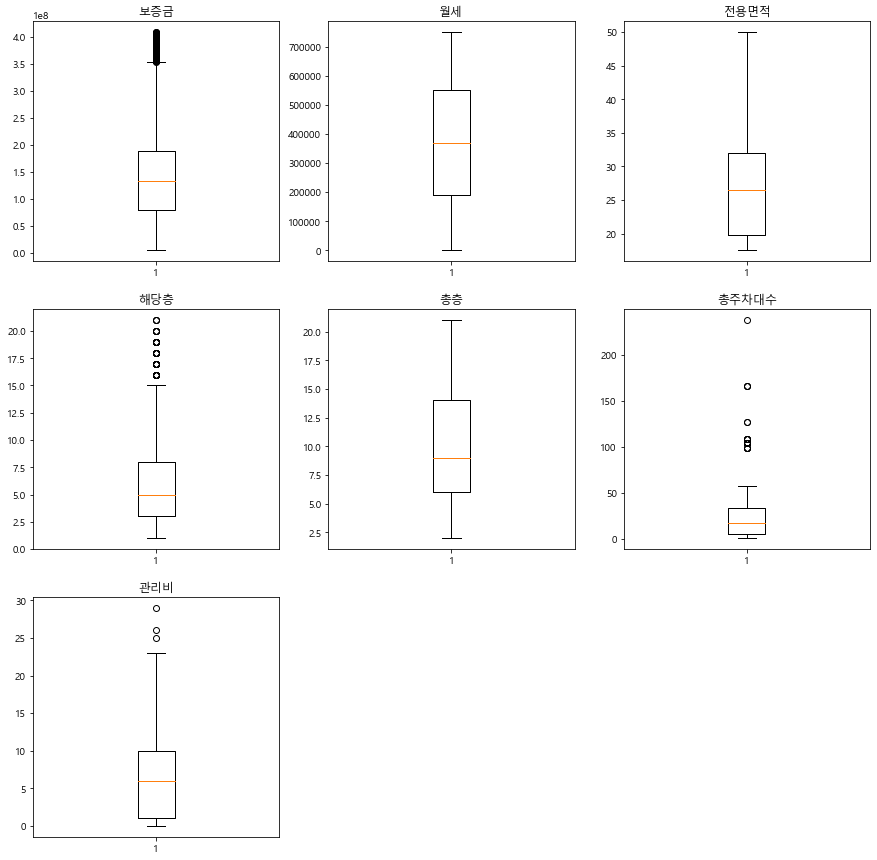

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

plt.rc('font', family='Malgun Gothic')
numeric = numeric.dropna()

axs[0, 0].boxplot(numeric['보증금'])
axs[0, 0].set_title("보증금")

axs[0, 1].boxplot(numeric['월세'])
axs[0, 1].set_title("월세")

axs[0, 2].boxplot(numeric['전용면적'])
axs[0, 2].set_title("전용면적")

axs[1, 0].boxplot(numeric['해당층'])
axs[1, 0].set_title("해당층")

axs[1, 1].boxplot(numeric['총층'])
axs[1, 1].set_title("총층")

axs[1, 2].boxplot(numeric['총주차대수'])
axs[1, 2].set_title("총주차대수")

axs[2, 0].boxplot(numeric['관리비'])
axs[2, 0].set_title("관리비")

axs[2, 1].axis("off")
axs[2, 2].axis("off")

plt.show()

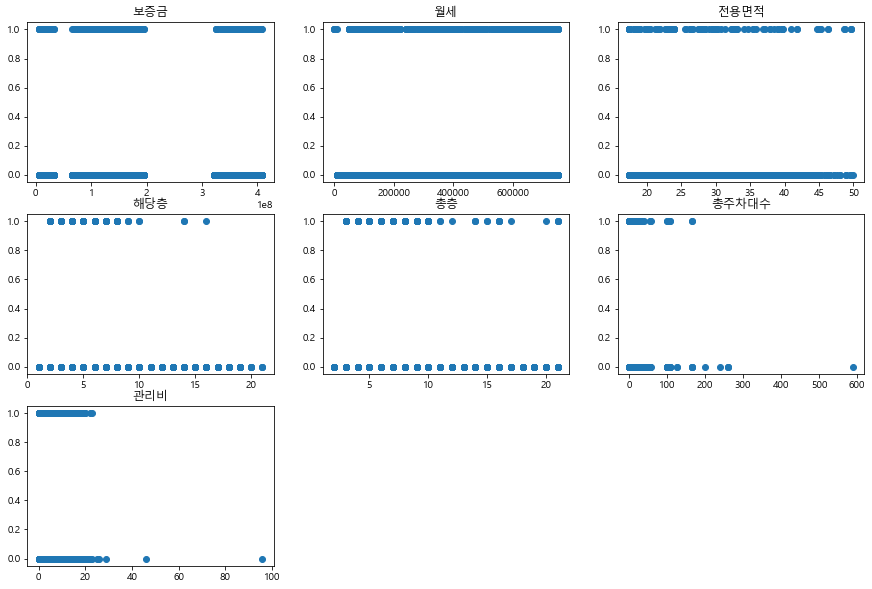

In [ ]:
fig, axs = plt.subplots(3, 3, figsize=(15, 10))

plt.rc('font', family='Malgun Gothic')

axs[0, 0].scatter(train['보증금'], train['허위매물여부'])
axs[0, 0].set_title("보증금")

axs[0, 1].scatter(train['월세'], train['허위매물여부'])
axs[0, 1].set_title("월세")

axs[0, 2].scatter(train['전용면적'], train['허위매물여부'])
axs[0, 2].set_title("전용면적")

axs[1, 0].scatter(train['해당층'], train['허위매물여부'])
axs[1, 0].set_title("해당층")

axs[1, 1].scatter(train['총층'], train['허위매물여부'])
axs[1, 1].set_title("총층")

axs[1, 2].scatter(train['총주차대수'], train['허위매물여부'])
axs[1, 2].set_title("총주차대수")

axs[2, 0].scatter(train['관리비'], train['허위매물여부'])
axs[2, 0].set_title("관리비")

axs[2, 1].axis("off")
axs[2, 2].axis("off")
plt.show()

<AxesSubplot:>

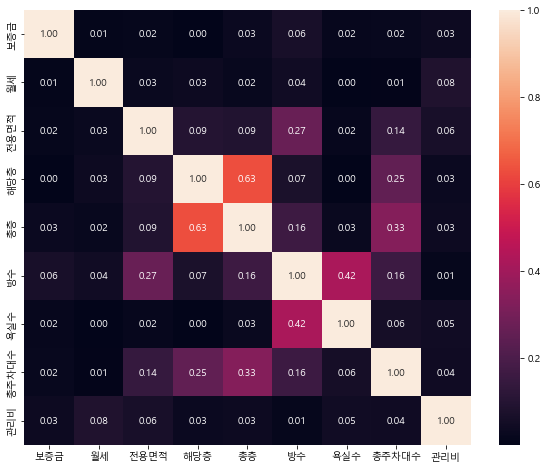

In [ ]:
plt.figure(figsize=(10,8))
sns.heatmap(data=abs(numeric.corr()), annot=True, fmt='.2f')